# Exploratory Data Analysis on Sample Superstore Data
We want to find out weak areas where we need to work to make more profits

In [4]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
superstore=pd.read_csv("C:/Users/shristi/Downloads/SampleSuperstore.csv")

In [7]:
superstore.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Data Summary

In [8]:
superstore.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
superstore.shape

(9994, 13)

In [11]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# Visualization using Correlation Matrix

In [15]:
corr_matrix=superstore.corr()
corr_matrix

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


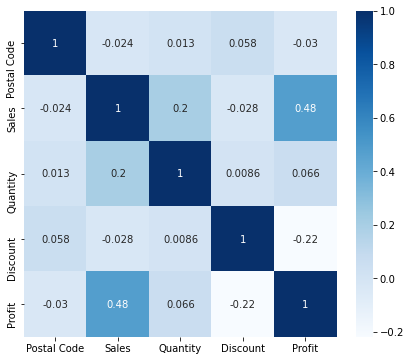

In [21]:
plt.rcParams['figure.figsize'] = (15,6)
plt.figure(figsize=(7,6))
sns.heatmap(corr_matrix, cmap='Blues', annot=True)

In [27]:
superstore['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

# Superstore Category visualization

Text(0.5, 1.0, 'Superstore Categories')

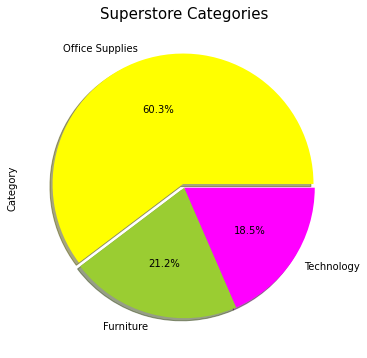

In [28]:
plt.figure(figsize=(15,6))
cat = superstore['Category'].value_counts()

cmap = plt.get_cmap('Spectral')
colors = ["yellow", "yellowgreen", "magenta"]
cat.plot.pie(autopct="%1.1f%%", shadow=True, colors=colors, explode = (0.03, 0, 0))
plt.title("Superstore Categories",fontsize=15)

# Visualizing Sub-Categories

In [29]:
superstore['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

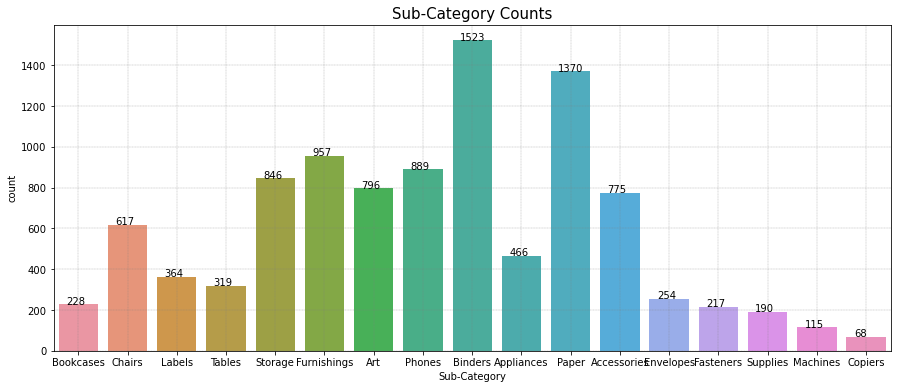

In [30]:
fig = plt.figure(figsize=(15,6))
axes = fig.add_subplot(111)
s = sns.countplot('Sub-Category', data = superstore)
for s in axes.patches:
    axes.annotate('{:.0f}'.format(s.get_height()), (s.get_x()+0.15, s.get_height()+1))
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.title("Sub-Category Counts", fontsize=15)
plt.show()

Text(0.5, 1.0, 'Superstore sub category products')

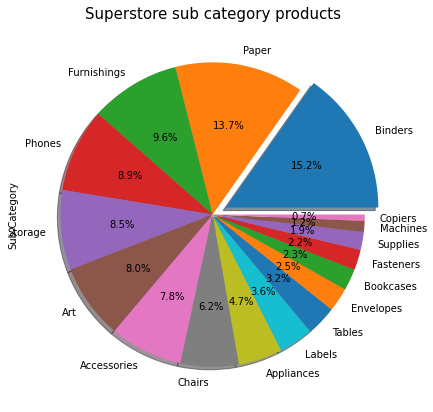

In [31]:
plt.figure(figsize=(15,7))
sub_cat = superstore['Sub-Category'].value_counts()
theme = plt.get_cmap('hsv')
sub_cat.plot.pie(autopct="%1.1f%%", shadow=True, explode=(0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0))
plt.title('Superstore sub category products', fontsize=15)

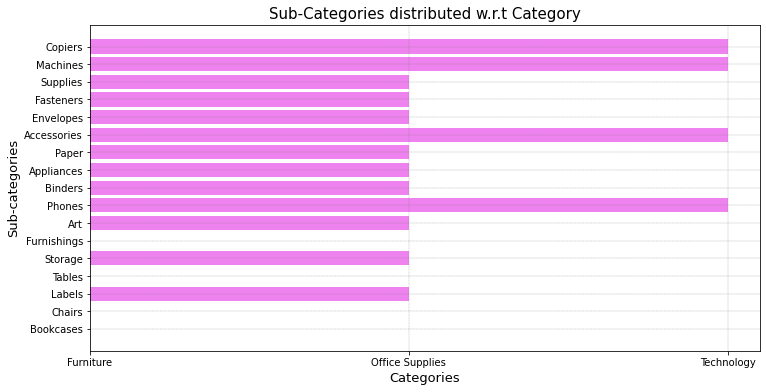

In [32]:
plt.figure(figsize=(12,6))
plt.barh('Sub-Category','Category', data=superstore, color='violet')
plt.xlabel("Categories",fontsize=13)
plt.ylabel("Sub-categories", fontsize=13)
plt.title("Sub-Categories distributed w.r.t Category",fontsize=15)
plt.grid(color='gray', linestyle='--', linewidth=0.3)

# Visualizing the total sales and profit by Sub- Category

<ipython-input-34-b1612e4608d0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sale_profit_sum = superstore.groupby('Sub-Category')['Sales','Profit'].agg(['sum'])


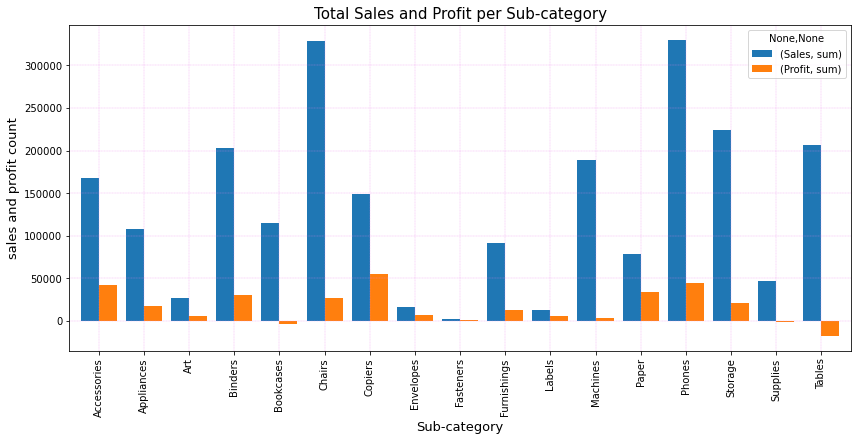

In [34]:
sale_profit_sum = superstore.groupby('Sub-Category')['Sales','Profit'].agg(['sum'])
sale_profit_sum.plot.bar(width=0.8,figsize=(14,6))
plt.title("Total Sales and Profit per Sub-category", fontsize=15)
plt.xlabel("Sub-category", fontsize=13)
plt.ylabel("sales and profit count",fontsize=13)
plt.grid(color='violet', linestyle='--', linewidth=0.3)

# Visualizing how much products are distributed regionwise

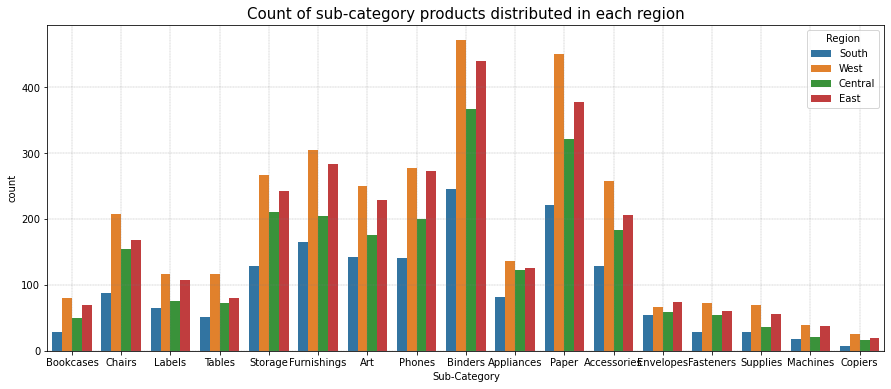

In [35]:

sns.countplot( data=superstore, x='Sub-Category', hue='Region')
plt.title("Count of sub-category products distributed in each region", fontsize=15)
plt.grid(color='gray', linestyle='--', linewidth=0.3)

# Finding the cost 

In [36]:
# adding new column 'Cost' in the existing dataset
superstore['Cost'] = superstore['Sales'] - superstore['Profit']
print(superstore.head())

        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit       Cost  
0      0.00   41.9136   220.0464  
1      0.00  219.5820 

# Cost visualization

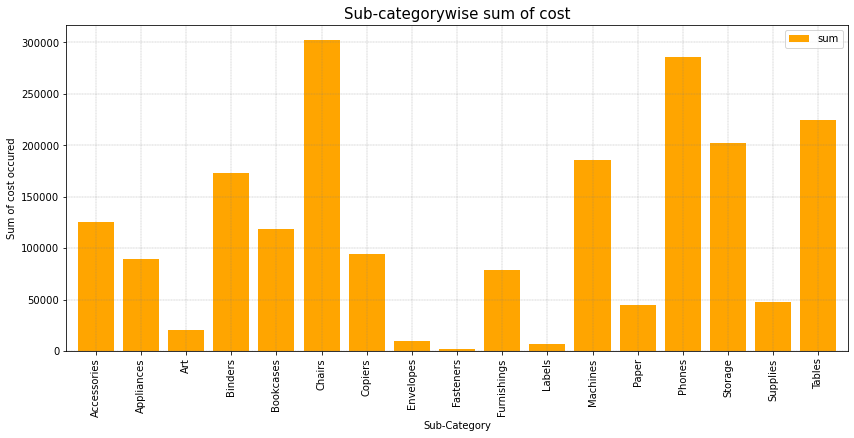

In [37]:
cost_occured = superstore.groupby('Sub-Category')['Cost'].agg(['sum'])
cost_occured.plot.bar(width=0.8,figsize=(14,6), color='orange')
plt.title('Sub-categorywise sum of cost',fontsize = 15)
plt.ylabel("Sum of cost occured")
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()


# Visualization of total sales by sub-category 

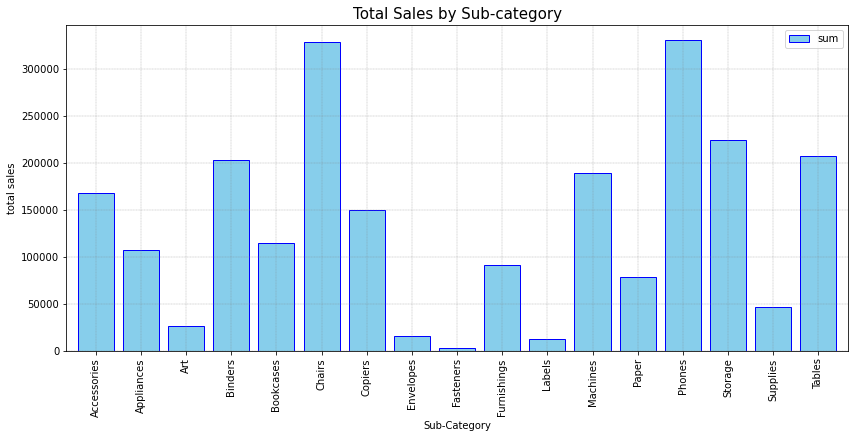

In [38]:
sub_cat_sales = superstore.groupby('Sub-Category')['Sales'].agg(['sum'])
sub_cat_sales.plot.bar(width=0.8,figsize=(14,6), color='skyblue', edgecolor='blue')
plt.title('Total Sales by Sub-category',fontsize = 15)
plt.ylabel('total sales')
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()

# Finding the percentage profit 

In [39]:
superstore['Profit %']=(superstore['Profit']/superstore['Cost'])*100
#Profit Percentage of first 5 product names
superstore.iloc[[0,1,2,3,4],[8,14]]

,Sub-Category,Profit %
0,Bookcases,19.047619
1,Chairs,42.857143
2,Labels,88.679245
3,Tables,-28.571429
4,Storage,12.676056


# Identifying which sub-category makes the most profit

In [40]:
#Products with high Profit Percentage 
superstore.sort_values(['Profit %','Sub-Category'],ascending=False).groupby('Profit %').head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
1696,Second Class,Home Office,United States,Bayonne,New Jersey,7002,East,Technology,Phones,104.980,2,0.0,52.4900,52.4900,100.000000
2592,Second Class,Corporate,United States,Summerville,South Carolina,29483,South,Technology,Phones,79.100,2,0.0,39.5500,39.5500,100.000000
6338,Standard Class,Corporate,United States,New York City,New York,10035,East,Technology,Phones,87.800,4,0.0,43.9000,43.9000,100.000000
246,Second Class,Home Office,United States,Lakeville,Minnesota,55044,Central,Office Supplies,Paper,47.880,6,0.0,23.9400,23.9400,100.000000
381,First Class,Corporate,United States,San Francisco,California,94109,West,Office Supplies,Paper,50.960,7,0.0,25.4800,25.4800,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,Standard Class,Corporate,United States,Austin,Texas,78745,Central,Office Supplies,Appliances,48.784,4,0.8,-131.7168,180.5008,-72.972973
8766,Standard Class,Corporate,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,24.588,3,0.8,-67.6170,92.2050,-73.333333
9164,Standard Class,Consumer,United States,Chicago,Illinois,60610,Central,Office Supplies,Appliances,143.128,2,0.8,-393.6020,536.7300,-73.333333
261,Standard Class,Corporate,United States,Pasadena,Texas,77506,Central,Office Supplies,Appliances,1.624,2,0.8,-4.4660,6.0900,-73.333333


# Count of Segmentation 

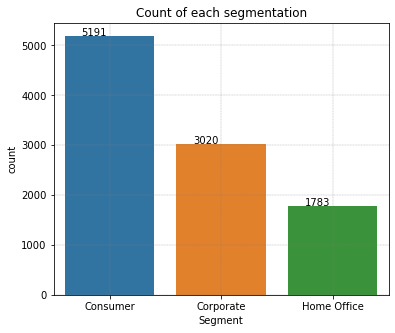

In [42]:
fig = plt.figure(figsize=(6,5))
axes = fig.add_subplot(111)
s = sns.countplot('Segment', data = superstore)
for s in axes.patches:
    axes.annotate('{:.0f}'.format(s.get_height()), (s.get_x()+0.15, s.get_height()+1))
plt.title("Count of each segmentation")
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()

# Calculating profits by each segments

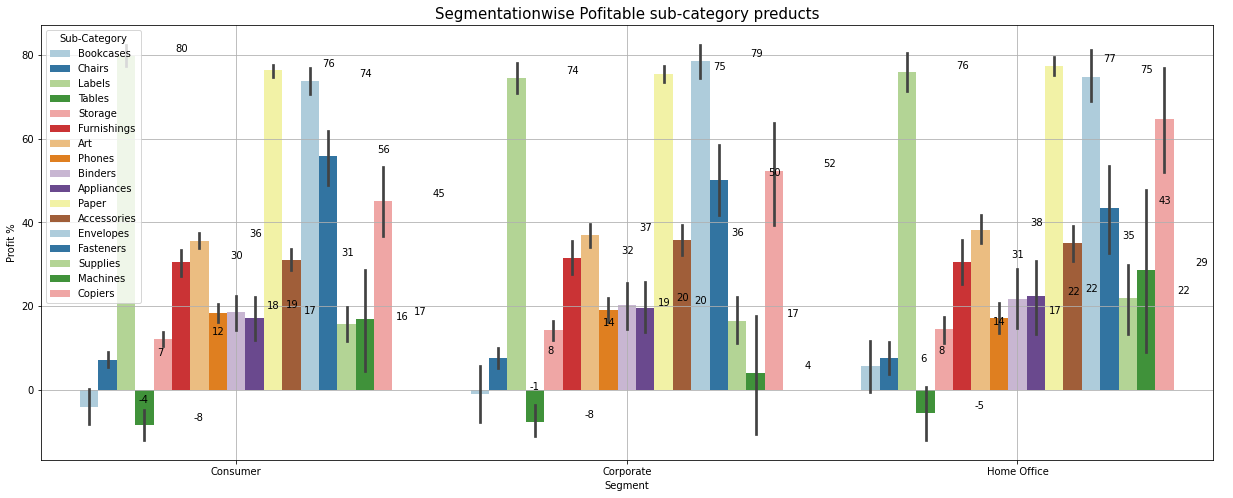

In [43]:
fig=plt.figure(figsize=(21,8))
ax = fig.add_subplot(111)
sns.barplot('Segment','Profit %',hue='Sub-Category',palette='Paired',data=superstore)
for o in ax.patches:
    ax.annotate('{:.0f}'.format(o.get_height()), (o.get_x()+0.15, o.get_height()+1))
plt.title("Segmentationwise Pofitable sub-category preducts", fontsize=15)
plt.grid()
plt.show()